# Download data

Download ephys data from the original paper from EBRAINS: https://search.kg.ebrains.eu/instances/a25f722e-f9b1-4f32-80bc-37206c2d1536

Navigate to `data/ecephys/`, open the two directories, select the NWB files, and click "Download file" on the right. Move the files to a new `data` directory in the base directory of this repo.

- `102335_2022-Jul-01_09-28-53.nwb` (15 GB)
- `104638_2023-Feb-10_11-04-33.nwb` (3 GB)

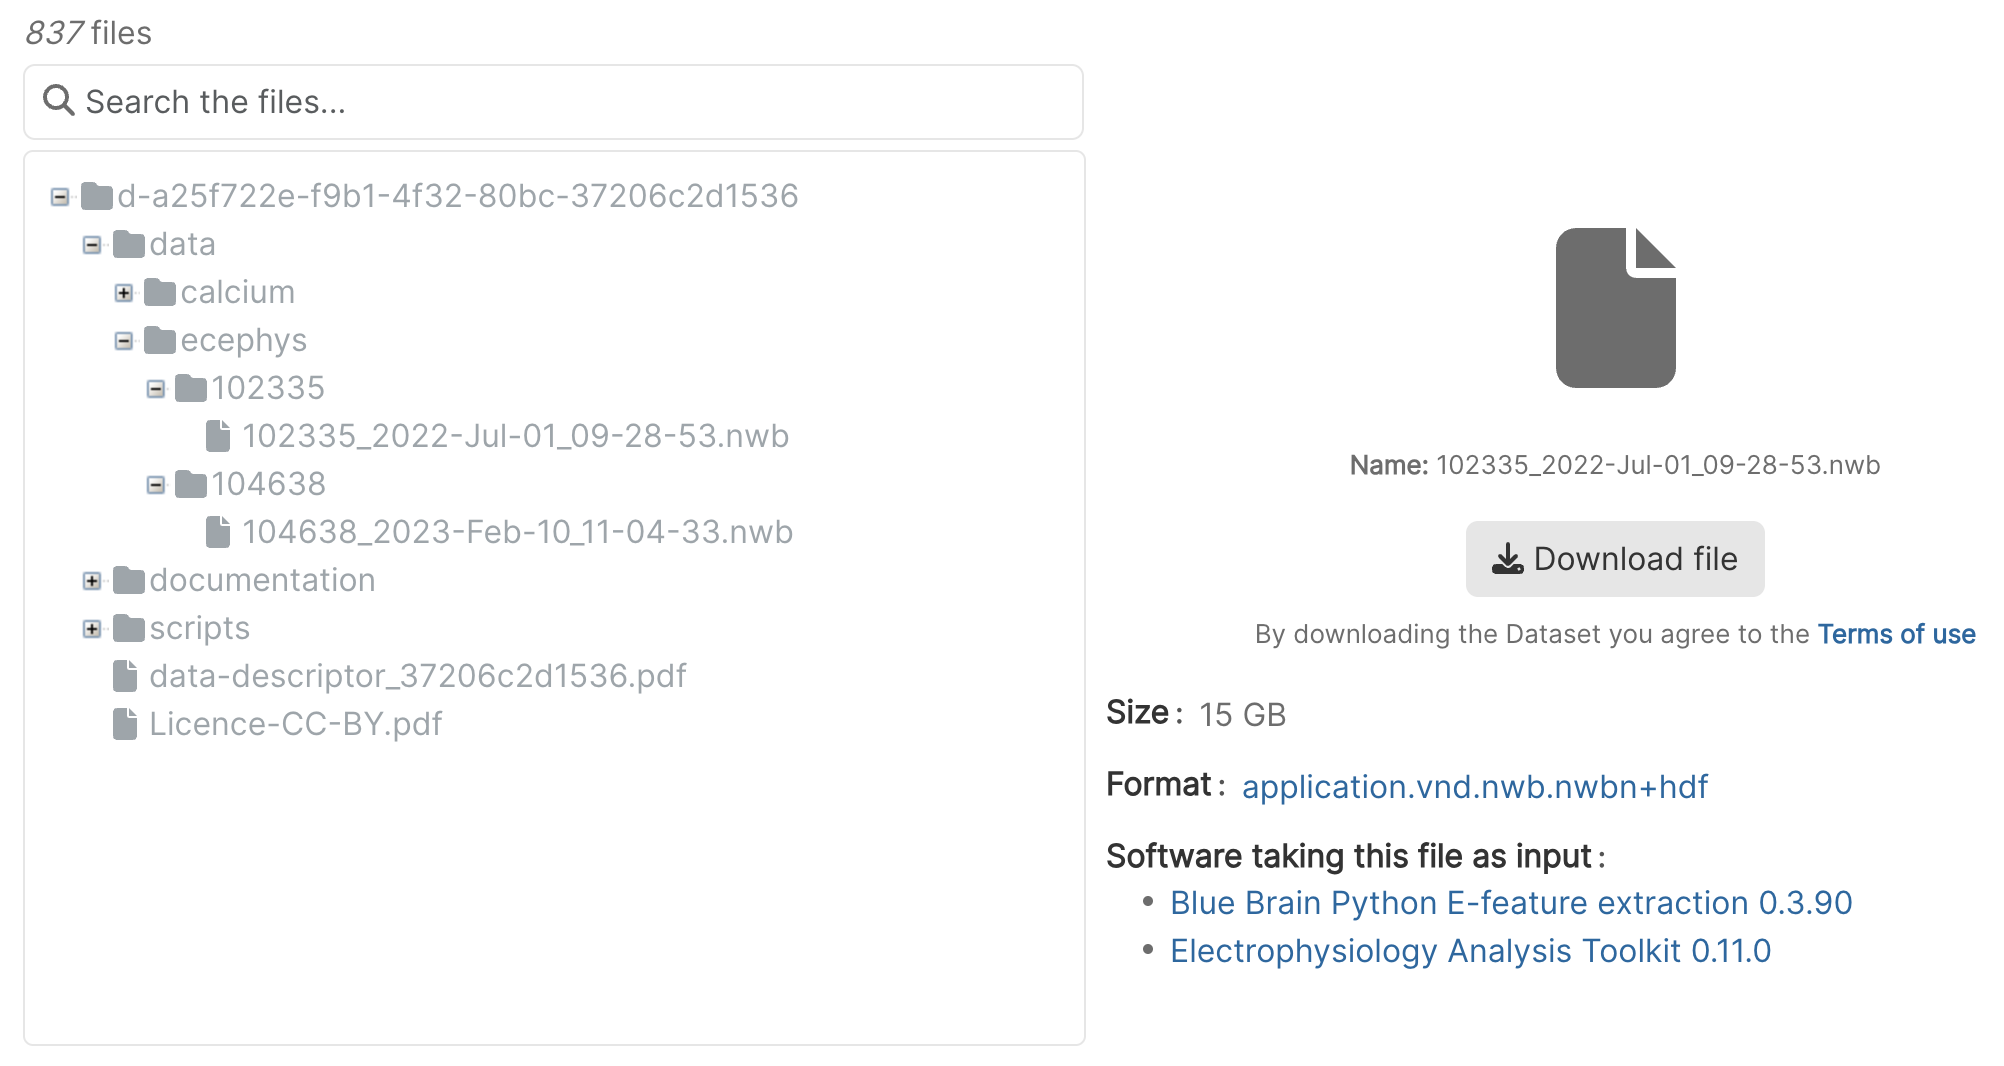

# Open the original data using pynwb

In [1]:
import pynwb

# mouse 102235, used both good and mua units (N=410)
# mouse 104638, used only good units (N=469)
file_path = "data/102335_2022-Jul-01_09-28-53.nwb"
io = pynwb.NWBHDF5IO(file_path, "r")
nwbfile = io.read()
nwbfile

/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.5.0 is already loaded.
  return func(args[0], **pargs)


,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
0,24.0,220.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935 pynwb.ecephys.ElectrodeGroup at 0x5332296064\nFields:\n description: mismatched sutures\n device: npx_102335_20403312941 pynwb.device.Device at 0x5328821840\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
1,-8.0,220.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935 pynwb.ecephys.ElectrodeGroup at 0x5332296064\nFields:\n description: mismatched sutures\n device: npx_102335_20403312941 pynwb.device.Device at 0x5328821840\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
2,24.0,235.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935 pynwb.ecephys.ElectrodeGroup at 0x5332296064\nFields:\n description: mismatched sutures\n device: npx_102335_20403312941 pynwb.device.Device at 0x5328821840\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
3,-8.0,235.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935 pynwb.ecephys.ElectrodeGroup at 0x5332296064\nFields:\n description: mismatched sutures\n device: npx_102335_20403312941 pynwb.device.Device at 0x5328821840\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
0,24.0,220.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935 pynwb.ecephys.ElectrodeGroup at 0x5332296064\nFields:\n description: mismatched sutures\n device: npx_102335_20403312941 pynwb.device.Device at 0x5328821840\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
1,-8.0,220.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935 pynwb.ecephys.ElectrodeGroup at 0x5332296064\nFields:\n description: mismatched sutures\n device: npx_102335_20403312941 pynwb.device.Device at 0x5328821840\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
2,24.0,235.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,"probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935 pynwb.ecephys.ElectrodeGroup at 0x5332296064\nFields:\n description: mismatched sutures\n device: npx_102335_20403312941 pynwb.device.Device at 0x5328821840\nFields:\n description: neuropixels 2.0 - MS\n\n location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5\n",probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935


In [2]:
electrodes_df = nwbfile.electrodes.to_dataframe()
electrodes_df

,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
0,24.0,220.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
1,-8.0,220.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
2,24.0,235.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
3,-8.0,235.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
4,24.0,250.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
...,...,...,...,...,...,...,...,...
4081,742.0,2020.0,NaN,-1.0,HP - CA1,N/A,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...
4082,774.0,2035.0,NaN,-1.0,HP - CA1,N/A,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...
4083,742.0,2035.0,NaN,-1.0,HP - CA1,N/A,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...


In [3]:
electrodes_df.iloc[382:386]

,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
3934,774.0,925.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
3935,742.0,925.0,NaN,-1.0,"MEC - Layer 2, MEC - Layer 3, MEC - Layer 5",N/A,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935
150,24.0,1345.0,NaN,-1.0,HP - CA1,N/A,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...
151,-8.0,1345.0,NaN,-1.0,HP - CA1,N/A,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...


In [4]:
electrodes_df["location"].unique()

array(['MEC - Layer 2, MEC - Layer 3, MEC - Layer 5', 'HP - CA1'],
      dtype=object)

In [5]:
electrodes_df[electrodes_df["location"] == "MEC - Layer 2, MEC - Layer 3, MEC - Layer 5"]["group"].unique()

array([probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935 pynwb.ecephys.ElectrodeGroup at 0x5332296064
       Fields:
         description: mismatched sutures
         device: npx_102335_20403312941 pynwb.device.Device at 0x5328821840
       Fields:
         description: neuropixels 2.0 - MS

         location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5                                     ],
      dtype=object)

In [6]:
electrodes_df[electrodes_df["location"] == "HP - CA1"]["group"].unique()

array([probe_1 - 150-245; 1430-1525; 2710-2805; 3990-4085 pynwb.ecephys.ElectrodeGroup at 0x5334908704
       Fields:
         description: mismatched sutures
         device: npx_102335_20403314883 pynwb.device.Device at 0x5329111520
       Fields:
         description: neuropixels 2.0 - MS

         location: HP - CA1                                                                           ],
      dtype=object)

In [7]:
probe0_group = electrodes_df[electrodes_df["location"] == "MEC - Layer 2, MEC - Layer 3, MEC - Layer 5"]["group"][0]
probe0_group

probe_0 - 0-95; 1280-1375; 2560-2655; 3840-3935 pynwb.ecephys.ElectrodeGroup at 0x5332296064
Fields:
  description: mismatched sutures
  device: npx_102335_20403312941 pynwb.device.Device at 0x5328821840
Fields:
  description: neuropixels 2.0 - MS

  location: MEC - Layer 2, MEC - Layer 3, MEC - Layer 5

In [8]:
units_df = nwbfile.units.to_dataframe()
units_df

,sampling_rate,cluster_quality,spike_times,electrodes,electrode_group,waveform_mean
id,,,,,,
0,30000.0,mua,"[0.03993359263519945, 0.09343359263485901, 0.7...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
1,30000.0,good,"[1.0426669259621522, 1.1582335926280833, 1.301...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
2,30000.0,mua,"[0.2821669259669914, 1.0057002592957207, 1.260...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
3,30000.0,mua,"[0.03926692596853702, 0.15043359263449632, 0.8...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
4,30000.0,mua,"[0.3115669259668043, 0.3500335926332262, 0.366...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
...,...,...,...,...,...,...
586,30000.0,good,"[838.0378, 958.3339666666667, 1463.26686666666...",x y z imp ...,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...,[nan]
587,30000.0,good,"[9.564733333333333, 14.456233333333333, 33.815...",x y z imp ...,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...,[nan]
588,30000.0,good,"[3.1285666666666665, 14.554633333333333, 19.41...",x y z imp ...,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...,[nan]


In [9]:
# the numbering of unit id's resets, and there are now two 0s
units_df.iloc[1000:1050].index

Index([1369, 1370, 1371, 1372, 1375, 1376, 1377, 1379, 1380, 1382, 1383, 1384,
       1385, 1386, 1388, 1389, 1390, 1392, 1393, 1394, 1395, 1396, 1397, 1398,
       1399, 1400, 1401, 1402, 1403, 1404,    0,    1,    2,    3,    4,    5,
          6,    7,    8,    9,   10,   11,   12,   13,   14,   15,   16,   18,
         19,   22],
      dtype='int64', name='id')

In [10]:
sorted(units_df.index)[:10]

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4]

In [11]:
units_df.loc[0]

,sampling_rate,cluster_quality,spike_times,electrodes,electrode_group,waveform_mean
id,,,,,,
0,30000.0,mua,"[0.03993359263519945, 0.09343359263485901, 0.7...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
0,30000.0,mua,"[1.2277, 2.7086333333333332, 3.101466666666666...",x y z imp ...,probe_1 - 150-245; 1430-1525; 2710-2805; 3990-...,[nan]


In [12]:
units_df.columns

Index(['sampling_rate', 'cluster_quality', 'spike_times', 'electrodes',
       'electrode_group', 'waveform_mean'],
      dtype='object')

In [13]:
units_df.cluster_quality.unique()

array(['mua', 'good'], dtype=object)

In [22]:
units_df.electrode_group == probe0_group

id
0       True
1       True
2       True
3       True
4       True
       ...  
586    False
587    False
588    False
589    False
590    False
Name: electrode_group, Length: 1529, dtype: bool

In [25]:
# mec_units = units_df[(units_df.electrode_group == probe0_group) & (units_df.cluster_quality == "good")]
mec_units = units_df[units_df.electrode_group == probe0_group]
mec_units

,sampling_rate,cluster_quality,spike_times,electrodes,electrode_group,waveform_mean
id,,,,,,
0,30000.0,mua,"[0.03993359263519945, 0.09343359263485901, 0.7...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
1,30000.0,good,"[1.0426669259621522, 1.1582335926280833, 1.301...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
2,30000.0,mua,"[0.2821669259669914, 1.0057002592957207, 1.260...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
3,30000.0,mua,"[0.03926692596853702, 0.15043359263449632, 0.8...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
4,30000.0,mua,"[0.3115669259668043, 0.3500335926332262, 0.366...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
...,...,...,...,...,...,...
1400,30000.0,mua,"[117.33416692522216, 117.51406692522102, 117.5...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
1401,30000.0,mua,"[3.548966925946204, 3.810033592611209, 4.14553...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]
1402,30000.0,good,"[2.041866925955794, 44.405100259019555, 44.806...",x y z imp ...,probe_0 - 0-95; 1280-1375; 2560-2655; 3840-393...,[nan]


In [26]:
# [len(mec_units["spike_times"][i]) for i in mec_units.index]

In [27]:
assert len(mec_units.index) == len(mec_units.index.unique())

In [28]:
import pynapple as nap
import numpy as np
nap.nap_config.set_backend("jax")

In [31]:
# nap_nwb = nap.load_file(file_path)
# nap_nwb

In [32]:
# type(nap_nwb["units"][0])

In [ ]:
# mec_units["spike_times"][0]

In [34]:
# manually construct tsgroup based on spike times from nwb file read from pynwb
# selected_unit_indices = range(21, 30)
selected_unit_indices = range(len(mec_units))
mec_tsgroup = nap.TsGroup({i: nap.Ts(mec_units["spike_times"][i]) for i in mec_units.index[selected_unit_indices]})

In [35]:
mec_tsgroup

Index    rate
-------  -------
0        1.29377
1        4.1493
2        2.75109
3        1.9717
4        3.39599
5        1.92867
6        2.08153
...      ...
1398     0.03511
1399     4.87564
1400     0.0723
1401     0.35052
1402     0.40224
1403     0.0339
1404     0.79117

In [36]:
len(mec_tsgroup)

1030

In [37]:
bin_size = 0.120
count = mec_tsgroup.count(bin_size)
count

/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/pynajax/utils.py:126: UserWarning: Converting 'd' to jax.ndarray. The provided array was of type 'ndarray'.
  return cast_to_jax(array, array_name, suppress_conversion_warnings)


Time (s)          0    1    2    3    4  ...
--------------  ---  ---  ---  ---  ---  -----
0.063633593       2    0    0    1    0  ...
0.183633593       0    0    0    1    0  ...
0.303633593       0    0    1    0    2  ...
0.423633593       0    0    0    0    3  ...
0.543633593       0    0    0    0    1  ...
0.663633593       0    0    0    0    2  ...
0.783633593       1    0    0    0    0  ...
...
9085.863633593    0    0    1    0    0  ...
9085.983633593    0    1    0    0    0  ...
9086.103633593    0    0    0    0    0  ...
9086.223633593    0    1    0    0    0  ...
9086.343633593    0    1    1    1    0  ...
9086.463633593    0    0    0    0    0  ...
9086.583633593    0    0    0    0    0  ...
dtype: int32, shape: (75722, 1030)

In [38]:
type(count)

pynapple.core.time_series.TsdFrame

In [39]:
# paper used a smoothing kernel of 5 seconds (!)
smoothed_binned_matrix = count.smooth(std=5)

In [40]:
smoothed_binned_matrix

Time (s)                0         1         2          3          4  ...
--------------  ---------  --------  --------  ---------  ---------  -----
0.063633593     0.147001   0.219713  0.26405   0.125291   0.292375   ...
0.183633593     0.149423   0.224844  0.269345  0.127669   0.297832   ...
0.303633593     0.15183    0.22999   0.27463   0.130049   0.303286   ...
0.423633593     0.154219   0.235146  0.279902  0.132432   0.308735   ...
0.543633593     0.156591   0.240307  0.285157  0.134815   0.314175   ...
0.663633593     0.158943   0.24547   0.290391  0.137197   0.319604   ...
0.783633593     0.161275   0.250629  0.295601  0.139578   0.325021   ...
...
9085.863633593  0.0538773  0.36676   0.190885  0.0938329  0.113906   ...
9085.983633593  0.0525186  0.360065  0.187312  0.0919568  0.111074   ...
9086.103633593  0.0511723  0.353357  0.183749  0.0900939  0.108267   ...
9086.223633593  0.0498392  0.34664   0.180197  0.0882447  0.105487   ...
9086.343633593  0.04852    0.339919  0.176656

In [41]:
type(smoothed_binned_matrix)

pynapple.core.time_series.TsdFrame

In [42]:
smoothed_binned_matrix.columns
# NOTE: the column names have been reset

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029],
      dtype='int64', length=1030)

In [43]:
np.max(smoothed_binned_matrix.loc[0])

Array(0.52236825, dtype=float32)

In [44]:
np.std(smoothed_binned_matrix.loc[0])

Array(0.06982074, dtype=float32)

In [45]:
smoothed_binned_matrix.times()

array([6.36335930e-02, 1.83633593e-01, 3.03633593e-01, ...,
       9.08634363e+03, 9.08646363e+03, 9.08658363e+03])

In [46]:
smoothed_binned_matrix.shape

(75722, 1030)

In [47]:
# binarize each spike train
smoothed_binned_matrix_binary_arr = np.zeros(smoothed_binned_matrix.shape)
for i, unit in enumerate(smoothed_binned_matrix.columns):
    cond = smoothed_binned_matrix.loc[unit] >= (np.mean(smoothed_binned_matrix.loc[unit]) + 1 * np.std(smoothed_binned_matrix.loc[unit]))
    cond.data
    # print(np.unique(cond))
    # print(np.sum(cond))
    # print(cond)
    # print(cond.as_array().astype(int))
    smoothed_binned_matrix_binary_arr[:,i] = cond.as_array().astype(int)

smoothed_binned_matrix_binary = nap.TsdFrame(
    t=smoothed_binned_matrix.times(),
    d=smoothed_binned_matrix_binary_arr,
    # columns=smoothed_binned_matrix.columns,
    columns=mec_tsgroup.keys(),
)

/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/pynajax/utils.py:126: UserWarning: Converting 'd' to jax.ndarray. The provided array was of type 'ndarray'.
  return cast_to_jax(array, array_name, suppress_conversion_warnings)
/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/pynajax/utils.py:126: UserWarning: Converting 'd' to jax.ndarray. The provided array was of type 'ndarray'.
  return cast_to_jax(array, array_name, suppress_conversion_warnings)
/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/pynajax/utils.py:126: UserWarning: Converting 'd' to jax.ndarray. The provided array was of type 'ndarray'.
  return cast_to_jax(array, array_name, suppress_conversion_warnings)
/Users/rly/mambaforge/envs/mec/lib/python3.12/site-packages/pynajax/utils.py:126: UserWarning: Converting 'd' to jax.ndarray. The provided array was of type 'ndarray'.
  return cast_to_jax(array, array_name, suppress_conversion_warnings)
/Users/rly/mambaforge/envs/mec/lib/python3.12/si

In [65]:
smoothed_binned_matrix_binary

Time (s)          0    1    2    3    4  ...
--------------  ---  ---  ---  ---  ---  -----
0.063633593       0    0    0    0    0  ...
0.183633593       0    0    0    0    0  ...
0.303633593       0    0    0    0    0  ...
0.423633593       0    0    0    0    0  ...
0.543633593       0    0    0    0    0  ...
0.663633593       0    0    0    0    0  ...
0.783633593       0    0    0    0    0  ...
...
9085.863633593    0    0    0    0    0  ...
9085.983633593    0    0    0    0    0  ...
9086.103633593    0    0    0    0    0  ...
9086.223633593    0    0    0    0    0  ...
9086.343633593    0    0    0    0    0  ...
9086.463633593    0    0    0    0    0  ...
9086.583633593    0    0    0    0    0  ...
dtype: float32, shape: (75722, 1030)

In [66]:
# keep only data after 5 seconds
trimmed_smoothed_binned_matrix_binary = smoothed_binned_matrix_binary.restrict(nap.IntervalSet(start=[5], end=[max(smoothed_binned_matrix_binary.times())]))
trimmed_smoothed_binned_matrix_binary

Time (s)          0    1    2    3    4  ...
--------------  ---  ---  ---  ---  ---  -----
5.103633593       1    0    0    0    0  ...
5.223633593       1    0    0    0    0  ...
5.343633593       1    0    1    0    0  ...
5.463633593       1    0    1    0    0  ...
5.583633593       1    0    1    0    0  ...
5.703633593       1    0    1    0    0  ...
5.823633593       1    0    1    0    0  ...
...
9085.863633593    0    0    0    0    0  ...
9085.983633593    0    0    0    0    0  ...
9086.103633593    0    0    0    0    0  ...
9086.223633593    0    0    0    0    0  ...
9086.343633593    0    0    0    0    0  ...
9086.463633593    0    0    0    0    0  ...
9086.583633593    0    0    0    0    0  ...
dtype: float32, shape: (75680, 1030)

In [50]:
import pandas as pd
import numpy as np
def my_compute_autocorrelogram(
    group, binsize, windowsize, time_units="s"
):
    newgroup = group
    autocorrs = {}

    binsize = nap.TsIndex.format_timestamps(
        np.array([binsize], dtype=np.float64), time_units
    )[0]
    windowsize = nap.TsIndex.format_timestamps(
        np.array([windowsize], dtype=np.float64), time_units
    )[0]

    for n in newgroup.keys():
        spk_time = newgroup[n].index
        auc, times = nap.process.correlograms._cross_correlogram(spk_time, spk_time, binsize, windowsize)
        autocorrs[n] = pd.Series(index=np.round(times, 6), data=auc, dtype="float")

    autocorrs = pd.DataFrame.from_dict(autocorrs)

    # DO NOT normalize
    # DO NOT zero out the center

    return autocorrs.astype("float")

In [ ]:
# testing pynapple compute_autocorrelogram normalization
# with norm=True, values are still > 1...
# binsize = 5
# aa = nap.process.compute_autocorrelogram(nap.TsGroup({0: mec_units["spike_times"][0]}), binsize=binsize, windowsize=560, norm=False)
# bb = my_compute_autocorrelogram(nap.TsGroup({0: mec_units["spike_times"][0]}), binsize=binsize, windowsize=560)
# print(aa[-5:5])
# print(bb[-5:5])

In [ ]:
# can't use binned matrices here i think - 
# use https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html instead?
# binsize = 1
# acorr_1 = my_compute_autocorrelogram(mec_tsgroup, binsize=binsize, windowsize=560)
# acorr = acorr_1
# acorr_1

In [51]:
binsize = 0.120
acorr_120 = my_compute_autocorrelogram(mec_tsgroup, binsize=binsize, windowsize=560)
acorr = acorr_120
acorr_120

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


,0,1,2,3,4,5,6,7,8,11,...,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404
-559.92,1.217109,4.088755,2.724218,1.837743,3.328688,1.903471,2.057118,2.296452,2.773429,4.242718,...,0.026330,0.144401,0.000000,0.000000,5.036905,0.012684,0.347985,0.380757,0.027056,0.947049
-559.80,1.248299,4.111963,2.638211,1.848441,3.351913,1.915835,2.032005,2.318414,2.785544,4.223235,...,0.039494,0.163033,0.045620,0.026123,5.089573,0.038052,0.416013,0.385317,0.000000,0.845041
-559.68,1.232704,4.129203,2.787223,1.822859,3.354884,1.884926,2.060202,2.374416,2.761314,4.217700,...,0.052659,0.181666,0.045620,0.000000,5.085999,0.025368,0.345369,0.419517,0.000000,0.892567
-559.56,1.201514,4.104227,2.694549,1.907048,3.336250,1.887779,2.036851,2.346232,2.728075,4.256666,...,0.000000,0.232905,0.106448,0.026123,5.217856,0.000000,0.300890,0.408117,0.000000,0.860110
-559.44,1.227742,4.127656,2.699216,1.859604,3.416996,1.894912,2.036851,2.353553,2.731492,4.258880,...,0.039494,0.232905,0.091241,0.000000,5.102928,0.190259,0.334903,0.387597,0.108225,0.869384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559.44,1.227742,4.127656,2.699216,1.859604,3.416996,1.894912,2.036851,2.353553,2.731492,4.258880,...,0.039494,0.232905,0.091241,0.000000,5.102928,0.190259,0.334903,0.387597,0.108225,0.869384
559.56,1.201514,4.104227,2.694549,1.907048,3.336250,1.887779,2.036851,2.346232,2.728075,4.256666,...,0.000000,0.232905,0.106448,0.026123,5.217856,0.000000,0.300890,0.408117,0.000000,0.860110
559.68,1.232704,4.129203,2.787223,1.822859,3.354884,1.884926,2.060202,2.374416,2.761314,4.217700,...,0.052659,0.181666,0.045620,0.000000,5.085999,0.025368,0.345369,0.419517,0.000000,0.892567
559.80,1.248299,4.111963,2.638211,1.848441,3.351913,1.915835,2.032005,2.318414,2.785544,4.223235,...,0.039494,0.163033,0.045620,0.026123,5.089573,0.038052,0.416013,0.385317,0.000000,0.845041


In [52]:
np.max(acorr)

101.70181280059194

In [53]:
type(acorr)

pandas.core.frame.DataFrame

In [54]:
acorr

,0,1,2,3,4,5,6,7,8,11,...,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404
-559.92,1.217109,4.088755,2.724218,1.837743,3.328688,1.903471,2.057118,2.296452,2.773429,4.242718,...,0.026330,0.144401,0.000000,0.000000,5.036905,0.012684,0.347985,0.380757,0.027056,0.947049
-559.80,1.248299,4.111963,2.638211,1.848441,3.351913,1.915835,2.032005,2.318414,2.785544,4.223235,...,0.039494,0.163033,0.045620,0.026123,5.089573,0.038052,0.416013,0.385317,0.000000,0.845041
-559.68,1.232704,4.129203,2.787223,1.822859,3.354884,1.884926,2.060202,2.374416,2.761314,4.217700,...,0.052659,0.181666,0.045620,0.000000,5.085999,0.025368,0.345369,0.419517,0.000000,0.892567
-559.56,1.201514,4.104227,2.694549,1.907048,3.336250,1.887779,2.036851,2.346232,2.728075,4.256666,...,0.000000,0.232905,0.106448,0.026123,5.217856,0.000000,0.300890,0.408117,0.000000,0.860110
-559.44,1.227742,4.127656,2.699216,1.859604,3.416996,1.894912,2.036851,2.353553,2.731492,4.258880,...,0.039494,0.232905,0.091241,0.000000,5.102928,0.190259,0.334903,0.387597,0.108225,0.869384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559.44,1.227742,4.127656,2.699216,1.859604,3.416996,1.894912,2.036851,2.353553,2.731492,4.258880,...,0.039494,0.232905,0.091241,0.000000,5.102928,0.190259,0.334903,0.387597,0.108225,0.869384
559.56,1.201514,4.104227,2.694549,1.907048,3.336250,1.887779,2.036851,2.346232,2.728075,4.256666,...,0.000000,0.232905,0.106448,0.026123,5.217856,0.000000,0.300890,0.408117,0.000000,0.860110
559.68,1.232704,4.129203,2.787223,1.822859,3.354884,1.884926,2.060202,2.374416,2.761314,4.217700,...,0.052659,0.181666,0.045620,0.000000,5.085999,0.025368,0.345369,0.419517,0.000000,0.892567
559.80,1.248299,4.111963,2.638211,1.848441,3.351913,1.915835,2.032005,2.318414,2.785544,4.223235,...,0.039494,0.163033,0.045620,0.026123,5.089573,0.038052,0.416013,0.385317,0.000000,0.845041


In [55]:
unit_id = acorr.columns[0]
acorr[unit_id][0-binsize:binsize]

-0.12     1.723942
-0.00    10.188414
 0.12     1.724651
Name: 0, dtype: float64

In [56]:
acorr_backup = acorr.copy()

In [57]:
# acorr = acorr_backup.copy()

In [58]:
# for i in acorr:
#     print(i)

In [59]:
# normalize each autocorrelation by the value at lag=0
# for i in acorr:
#     center = acorr[i][0]
#     acorr[i].values[:] = acorr[i].values[:] / center
# acorr

,0,1,2,3,4,5,6,7,8,11,...,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404
-559.92,0.119460,0.317367,0.236144,0.151090,0.233319,0.179483,0.170957,0.205033,0.224756,0.293771,...,0.001415,0.016004,0.000000,0.000000,0.166475,0.000538,0.039501,0.031197,0.001639,0.090117
-559.80,0.122521,0.319168,0.228689,0.151969,0.234947,0.180648,0.168870,0.206993,0.225738,0.292422,...,0.002123,0.018069,0.002809,0.002179,0.168216,0.001614,0.047223,0.031571,0.000000,0.080410
-559.68,0.120991,0.320506,0.241606,0.149866,0.235155,0.177734,0.171213,0.211993,0.223775,0.292039,...,0.002831,0.020134,0.002809,0.000000,0.168098,0.001076,0.039204,0.034373,0.000000,0.084933
-559.56,0.117929,0.318568,0.233572,0.156788,0.233849,0.178003,0.169272,0.209477,0.221081,0.294737,...,0.000000,0.025813,0.006554,0.002179,0.172456,0.000000,0.034155,0.033439,0.000000,0.081844
-559.44,0.120504,0.320386,0.233977,0.152887,0.239509,0.178676,0.169272,0.210131,0.221358,0.294890,...,0.002123,0.025813,0.005618,0.000000,0.168657,0.008069,0.038016,0.031758,0.006557,0.082727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559.44,0.120504,0.320386,0.233977,0.152887,0.239509,0.178676,0.169272,0.210131,0.221358,0.294890,...,0.002123,0.025813,0.005618,0.000000,0.168657,0.008069,0.038016,0.031758,0.006557,0.082727
559.56,0.117929,0.318568,0.233572,0.156788,0.233849,0.178003,0.169272,0.209477,0.221081,0.294737,...,0.000000,0.025813,0.006554,0.002179,0.172456,0.000000,0.034155,0.033439,0.000000,0.081844
559.68,0.120991,0.320506,0.241606,0.149866,0.235155,0.177734,0.171213,0.211993,0.223775,0.292039,...,0.002831,0.020134,0.002809,0.000000,0.168098,0.001076,0.039204,0.034373,0.000000,0.084933
559.80,0.122521,0.319168,0.228689,0.151969,0.234947,0.180648,0.168870,0.206993,0.225738,0.292422,...,0.002123,0.018069,0.002809,0.002179,0.168216,0.001614,0.047223,0.031571,0.000000,0.080410


In [79]:
# z-score each autocorrelation
import scipy.stats
for i in acorr:
    acorr[i].values[:] = scipy.stats.zscore(acorr[i].values)
acorr

,0,1,2,3,4,5,6,7,8,11,...,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404
-559.92,-0.866259,-1.185819,-0.995620,-0.800009,-1.437197,-0.714900,-0.358202,-1.464765,-0.999668,-0.893127,...,-0.547898,-0.630141,-0.440888,-0.449859,-1.332025,-0.572390,-0.362741,-0.869285,-0.463709,-0.337227
-559.80,-0.602672,-1.034478,-1.698042,-0.715463,-1.311362,-0.600653,-0.546104,-1.289306,-0.913334,-0.984825,...,-0.502844,-0.440471,-0.237648,-0.276201,-1.276569,-0.506503,0.361101,-0.840547,-0.567550,-1.176265
-559.68,-0.734465,-0.922054,-0.481054,-0.917637,-1.295267,-0.886271,-0.335127,-0.841883,-1.086003,-1.010876,...,-0.457789,-0.250801,-0.237648,-0.449859,-1.280332,-0.539447,-0.390581,-0.625011,-0.567550,-0.785350
-559.56,-0.998052,-1.084925,-1.237928,-0.252302,-1.396227,-0.859906,-0.509842,-1.067056,-1.322870,-0.827480,...,-0.638007,0.270793,0.033340,-0.276201,-1.141495,-0.605333,-0.863862,-0.696856,-0.567550,-1.052316
-559.44,-0.776400,-0.932143,-1.199812,-0.627242,-0.958731,-0.793994,-0.509842,-1.008570,-1.298519,-0.817060,...,-0.502844,0.270793,-0.034407,-0.449859,-1.262507,-0.111181,-0.501942,-0.826178,-0.152185,-0.976040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559.44,-0.776400,-0.932143,-1.199812,-0.627242,-0.958731,-0.793994,-0.509842,-1.008570,-1.298519,-0.817060,...,-0.502844,0.270793,-0.034407,-0.449859,-1.262507,-0.111181,-0.501942,-0.826178,-0.152185,-0.976040
559.56,-0.998052,-1.084925,-1.237928,-0.252302,-1.396227,-0.859906,-0.509842,-1.067056,-1.322870,-0.827480,...,-0.638007,0.270793,0.033340,-0.276201,-1.141495,-0.605333,-0.863862,-0.696856,-0.567550,-1.052316
559.68,-0.734465,-0.922054,-0.481054,-0.917637,-1.295267,-0.886271,-0.335127,-0.841883,-1.086003,-1.010876,...,-0.457789,-0.250801,-0.237648,-0.449859,-1.280332,-0.539447,-0.390581,-0.625011,-0.567550,-0.785350
559.80,-0.602672,-1.034478,-1.698042,-0.715463,-1.311362,-0.600653,-0.546104,-1.289306,-0.913334,-0.984825,...,-0.502844,-0.440471,-0.237648,-0.276201,-1.276569,-0.506503,0.361101,-0.840547,-0.567550,-1.176265


In [80]:
# verify
acorr[unit_id][0-binsize:binsize]

-0.12     3.417016
-0.00    74.950688
 0.12     3.423006
Name: 0, dtype: float64

In [81]:
np.max(acorr.values)

90.95238040538372

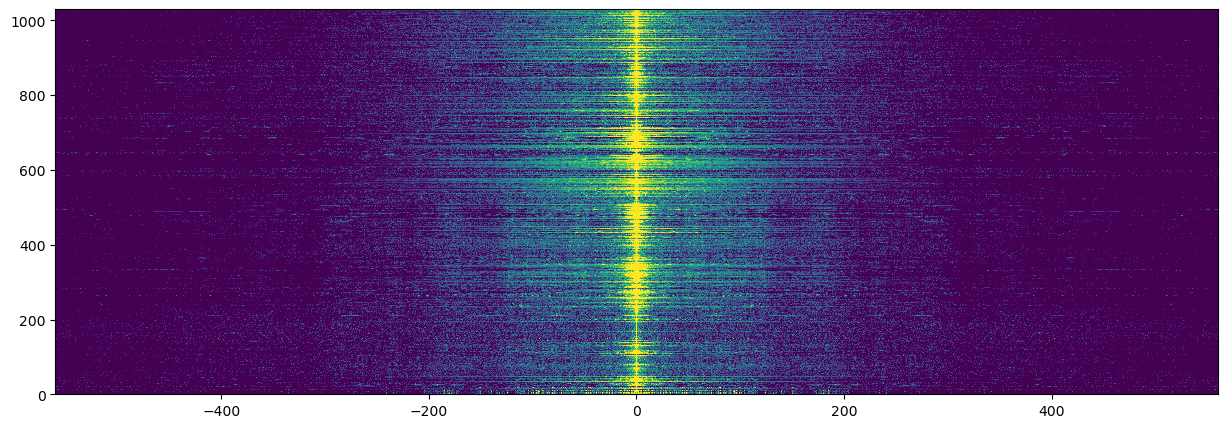

In [82]:
import matplotlib.pyplot as plt
acorr_x = acorr.index.values
plt.figure(figsize=(15, 5))
plt.imshow(acorr.values.T, extent=(-560, 560, 0, len(acorr.keys())), interpolation='none', aspect='auto')
plt.clim([0, 2])

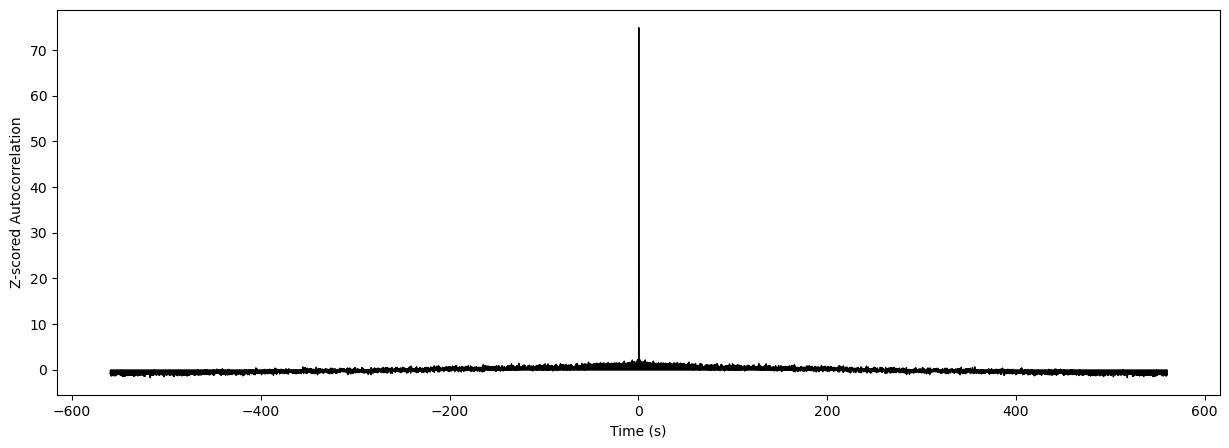

In [83]:
import matplotlib.pyplot as plt
acorr_x = acorr.index.values
plt.figure(figsize=(15, 5))
plt.xlabel("Time (s)")
plt.ylabel("Z-scored Autocorrelation")
plt.fill_between(
    acorr_x, np.zeros_like(acorr_x), acorr[unit_id].values, color="black"
)

In [84]:
from scipy import signal

# nperseg should be power of 2 close to the number of bins in 17.6 minutes (used by their paper)
if binsize == 0.120:
    nperseg = 8196  # 17.6*60/0.120 = 8800
elif binsize == 1:
    nperseg = 1024  # 17.6*60/1 == 1056
else:
    raise ValueError("hard-coded Fs not found")
Pxxs = np.zeros((len(acorr.keys()), int(nperseg/2+1)))

Fs = 1/binsize
for i, key in enumerate(acorr.keys()):
    f, Pxxs[i,:] = signal.welch(acorr[key].values, Fs, window="hamming", nperseg=nperseg)

(0.0, 0.06)

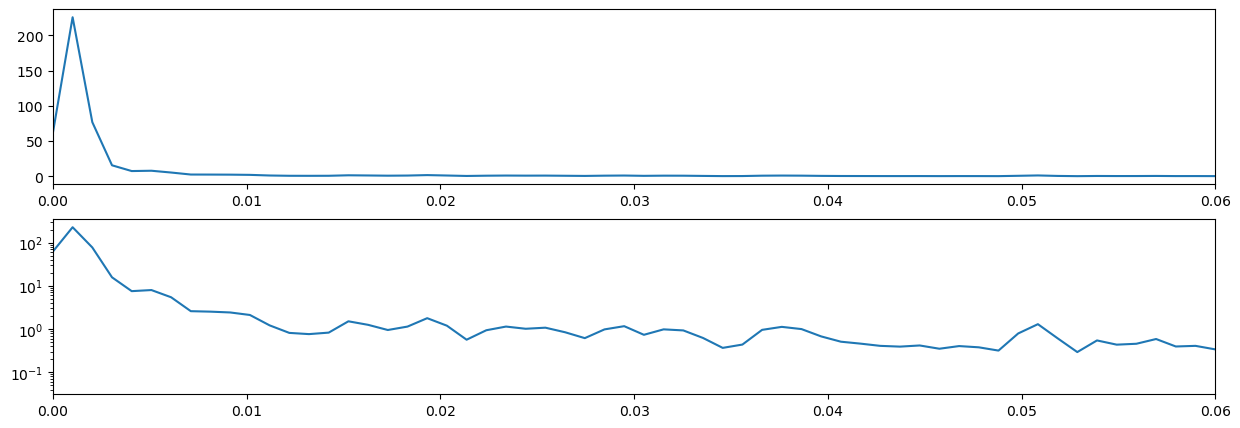

In [85]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.plot(f, Pxxs[0])
plt.xlim([0, 0.06])
plt.subplot(2, 1, 2)
plt.semilogy(f, Pxxs[0])
plt.xlim([0, 0.06])

In [107]:
Pxxs.shape

(1030, 4099)

In [108]:
ind = np.argsort(np.max(Pxxs, axis=1))[::-1]  # largest power first
ind

array([123,  78, 996, ..., 131, 998, 468])

In [109]:
len(ind)

1030

In [110]:
acorr.columns[ind]

Index([ 152,   97, 1363,  447, 1355,  478,  575,   22,  457,  459,
       ...
       1219,  348, 1386, 1382,  960,  166,  651,  161, 1367,  652],
      dtype='int64', length=1030)

In [111]:
acorr_sort_by_pxx = acorr.loc[:, acorr.columns[ind]]

In [112]:
acorr_sort_by_pxx

,152,97,1363,447,1355,478,575,22,457,459,...,1219,348,1386,1382,960,166,651,161,1367,652
-559.92,-0.577251,-0.991430,-1.198411,-1.461884,-1.409084,-1.347703,-1.229651,-0.935018,-1.117101,-1.550198,...,-0.085263,0.363716,-0.381603,-0.573569,0.224721,-0.074379,-0.603736,-0.270791,-0.363993,-0.288461
-559.80,-0.651127,-0.901987,-1.163757,-1.361084,-1.390556,-1.245575,-1.202231,-1.129670,-1.029959,-1.562123,...,-0.631700,0.244437,0.116816,-0.410421,-0.267695,0.132468,0.808793,-0.270791,-0.513911,0.243736
-559.68,-0.596113,-0.999097,-1.190188,-1.335619,-1.372027,-1.206619,-1.175233,-0.842616,-1.025906,-1.616737,...,-0.234291,-0.113400,-0.381603,-0.084126,-0.144591,0.856432,0.455661,0.057742,-0.214075,0.775932
-559.56,-0.562056,-1.028060,-1.177853,-1.312276,-1.463060,-1.233994,-1.060912,-1.014545,-0.934711,-1.568234,...,-0.184615,0.065519,0.216499,-0.165700,-0.021487,-0.074379,-0.427170,-0.708834,0.035789,-0.288461
-559.44,-0.595589,-1.017837,-1.105021,-1.348352,-1.393778,-1.148712,-1.138110,-1.007729,-0.858715,-1.615136,...,-0.482672,0.184798,-0.381603,-0.328848,-0.144591,0.339315,0.455661,-0.161280,0.085762,-0.288461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559.44,-0.595589,-1.017837,-1.105021,-1.348352,-1.393778,-1.148712,-1.138110,-1.007729,-0.858715,-1.615136,...,-0.482672,0.184798,-0.381603,-0.328848,-0.144591,0.339315,0.455661,-0.161280,0.085762,-0.288461
559.56,-0.562056,-1.028060,-1.177853,-1.312276,-1.463060,-1.233994,-1.060912,-1.014545,-0.934711,-1.568234,...,-0.184615,0.065519,0.216499,-0.165700,-0.021487,-0.074379,-0.427170,-0.708834,0.035789,-0.288461
559.68,-0.596113,-0.999097,-1.190188,-1.335619,-1.372027,-1.206619,-1.175233,-0.842616,-1.025906,-1.616737,...,-0.234291,-0.113400,-0.381603,-0.084126,-0.144591,0.856432,0.455661,0.057742,-0.214075,0.775932
559.80,-0.651127,-0.901987,-1.163757,-1.361084,-1.390556,-1.245575,-1.202231,-1.129670,-1.029959,-1.562123,...,-0.631700,0.244437,0.116816,-0.410421,-0.267695,0.132468,0.808793,-0.270791,-0.513911,0.243736


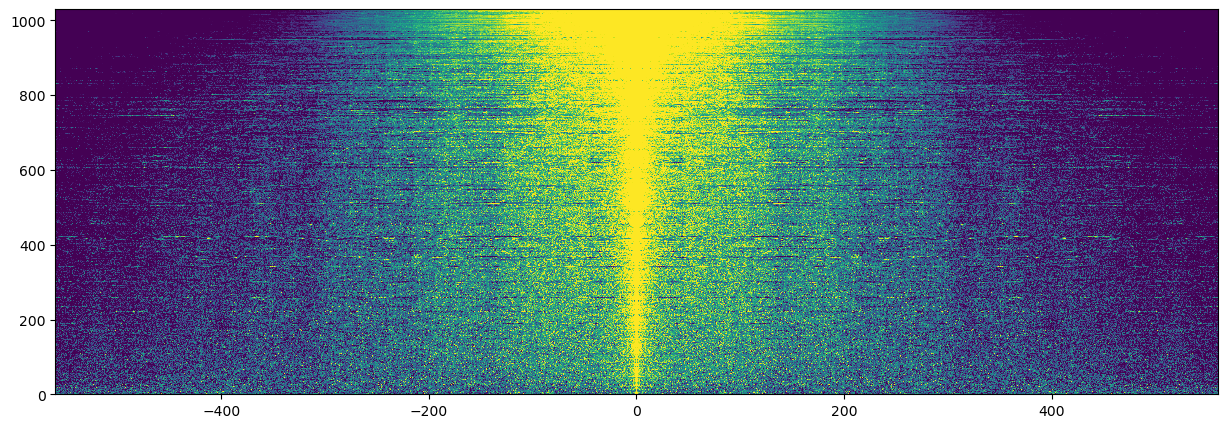

In [116]:
plt.figure(figsize=(15, 5))
plt.imshow(acorr_sort_by_pxx.values.T, extent=(-560, 560, 0, len(acorr.keys())), interpolation='none', aspect='auto')
plt.clim([-0.5, 1])